In [2]:
from scipy.interpolate import make_interp_spline

import pandas as pd
import glob
from utils import convert_csv_to_graph
from network import get_network_stats
import networkx as nx
import matplotlib.pyplot as plt
import csv
import numpy as np
import seaborn as sns
from scipy.signal import savgol_filter
from scipy.interpolate import interp1d
from utils import smooth
from data import get_MIM_df, get_MIM_df_no_merge

In [3]:
sns.set_style('darkgrid')  # darkgrid, white grid, dark, white and ticks
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=13)          # controls default text
palette = sns.color_palette()

In [4]:
# Base case (w = 25, bfp = 0.15, b=2) 
mim1_bfp015_mdf, mim1_bfp015_adf = get_MIM_df('1_w=25')
mim1_bfp03_mdf, mim1_bfp03_adf = get_MIM_df('1_bfp=0.3')
mim1_bfp06_mdf, mim1_bfp06_adf = get_MIM_df('1_bfp=0.6')

mim2_bfp015_mdf, mim2_bfp015_adf = get_MIM_df('2_w=25')
mim2_bfp03_mdf, mim2_bfp03_adf = get_MIM_df('2_bfp=0.3')
mim2_bfp06_mdf, mim2_bfp06_adf = get_MIM_df('2_bfp=0.6')

mim3_bfp015_mdf, mim3_bfp015_adf = get_MIM_df('3_w=25')
mim3_bfp03_mdf, mim3_bfp03_adf = get_MIM_df('3_bfp=0.3')
mim3_bfp06_mdf, mim3_bfp06_adf = get_MIM_df('3_bfp=0.6')

#---------------------------------------------------------------------------
#                            No merging (10 simulations)
#---------------------------------------------------------------------------

mim1_bfp015_mdf_nm, mim1_bfp015_adf_nm = get_MIM_df_no_merge('1_w=25')
mim1_bfp03_mdf_nm, mim1_bfp03_adf_nm = get_MIM_df_no_merge('1_bfp=0.3')
mim1_bfp06_mdf_nm, mim1_bfp06_adf_nm = get_MIM_df_no_merge('1_bfp=0.6')

mim2_bfp015_mdf_nm, mim2_bfp015_adf_nm = get_MIM_df_no_merge('2_w=25')
mim2_bfp03_mdf_nm, mim2_bfp03_adf_nm = get_MIM_df_no_merge('2_bfp=0.3')
mim2_bfp06_mdf_nm, mim2_bfp06_adf_nm = get_MIM_df_no_merge('2_bfp=0.6')

mim3_bfp015_mdf_nm, mim3_bfp015_adf_nm = get_MIM_df_no_merge('3_w=25')
mim3_bfp03_mdf_nm, mim3_bfp03_adf_nm = get_MIM_df_no_merge('3_bfp=0.3')
mim3_bfp06_mdf_nm, mim3_bfp06_adf_nm = get_MIM_df_no_merge('3_bfp=0.6')

<Figure size 640x480 with 0 Axes>

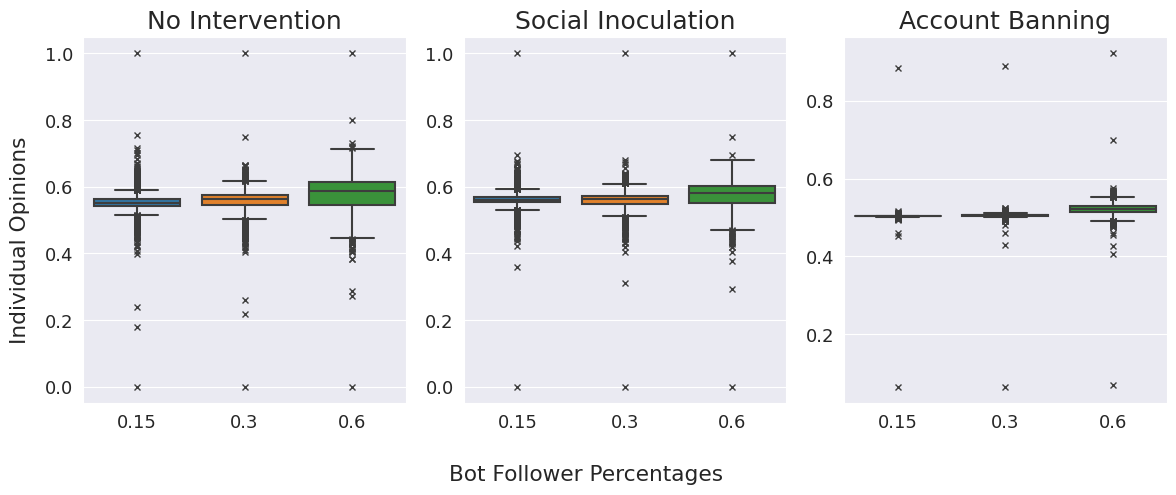

In [5]:
# we need to get a distribution of agent opinions of each experiment
# by working out the average long-run opinion of each agent across 10 experiments

plt.tight_layout()
# TODO: we need to find out the average of agentdf during the last 200 iterations

# We establish the x-axis as w, y axis
# as the distributions of average opinions over the last 200 iterations

num_agent = 1069

fig1, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 5))

bfps = [0.15, 0.3, 0.6]

x = sum([[bfp] * num_agent for bfp in bfps], [])

# TODO: concatenate rows
mim1_y = list(pd.concat([mim1_bfp015_adf['opinion'][-num_agent:], mim1_bfp03_adf['opinion'][-num_agent:],mim1_bfp06_adf['opinion'][-num_agent:],
                         ], axis=0, ignore_index=True, sort=False,))

mim2_y = list(pd.concat([mim2_bfp015_adf['opinion'][-num_agent:], mim2_bfp03_adf['opinion'][-num_agent:],mim2_bfp06_adf['opinion'][-num_agent:],
                         ], axis=0, ignore_index=True, sort=False,))

mim3_y = list(pd.concat([mim3_bfp015_adf['opinion'][-num_agent:], mim3_bfp03_adf['opinion'][-num_agent:],mim3_bfp06_adf['opinion'][-num_agent:],
                         ], axis=0, ignore_index=True, sort=False))


# axes[0].set_ylim(0.4, 0.6)
# axes[1].set_ylim(0.4, 0.6)
# axes[2].set_ylim(0.4, 0.6)

sns.boxplot(x=x, y=mim1_y, ax=axes[0], flierprops={'marker': 'x', }).set_title('No Intervention')
sns.boxplot(x=x, y=mim2_y, ax=axes[2], flierprops={'marker': 'x', }).set_title('Account Banning')
sns.boxplot(x=x, y=mim3_y, ax=axes[1], flierprops={'marker': 'x', }).set_title('Social Inoculation')


fig1.supylabel('Individual Opinions')

fig1.supxlabel('Bot Follower Percentages')



plt.tight_layout()


plt.savefig('data/graphs/exp2_op_box.png', dpi=500)


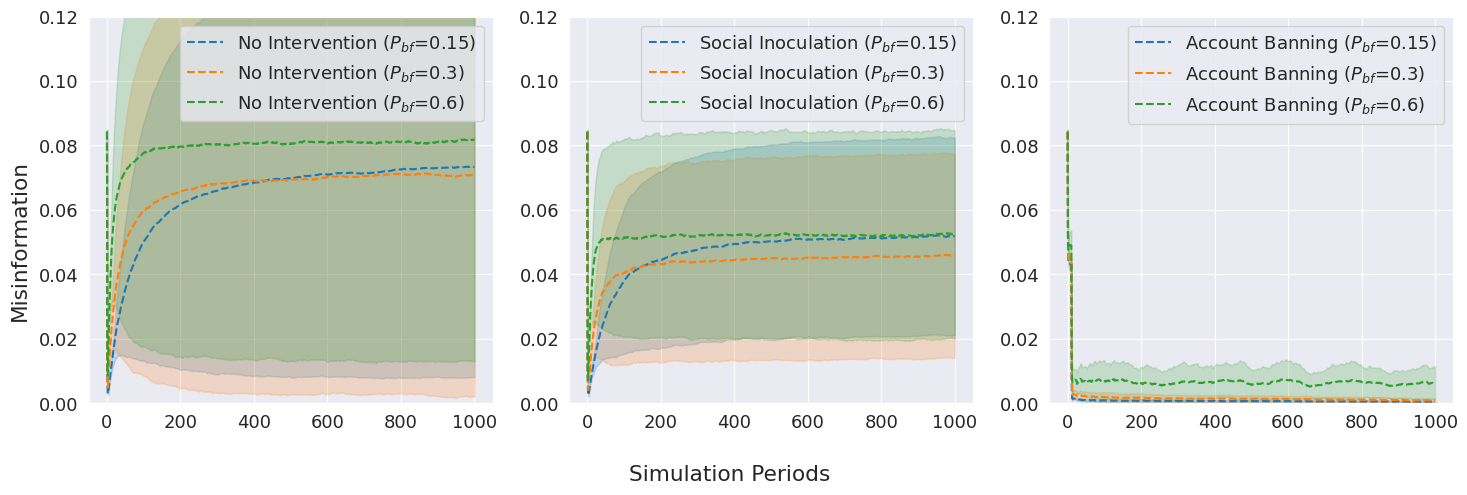

In [6]:

fig1, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
x = np.linspace(0, 1000, 1000)

mim1_bfp015_y = mim1_bfp015_mdf['misinformation']
mim1_bfp03_y = mim1_bfp03_mdf['misinformation']
mim1_bfp06_y = mim1_bfp06_mdf['misinformation']

mim2_bfp015_y = mim2_bfp015_mdf['misinformation']
mim2_bfp03_y = mim2_bfp03_mdf['misinformation']
mim2_bfp06_y = mim2_bfp06_mdf['misinformation']

mim3_bfp015_y = mim3_bfp015_mdf['misinformation']
mim3_bfp03_y = mim3_bfp03_mdf['misinformation']
mim3_bfp06_y = mim3_bfp06_mdf['misinformation']



mim1_bfp015_std = np.std([mdf['misinformation'] for mdf in mim1_bfp015_mdf_nm], axis=0)
mim1_bfp03_std = np.std([mdf['misinformation'] for mdf in mim1_bfp03_mdf_nm], axis=0)
mim1_bfp06_std = np.std([mdf['misinformation'] for mdf in mim1_bfp06_mdf_nm], axis=0)

mim2_bfp015_std = np.std([mdf['misinformation'] for mdf in mim2_bfp015_mdf_nm], axis=0)
mim2_bfp03_std = np.std([mdf['misinformation'] for mdf in mim2_bfp03_mdf_nm], axis=0)
mim2_bfp06_std = np.std([mdf['misinformation'] for mdf in mim2_bfp06_mdf_nm], axis=0)

mim3_bfp015_std = np.std([mdf['misinformation'] for mdf in mim3_bfp015_mdf_nm], axis=0)
mim3_bfp03_std = np.std([mdf['misinformation'] for mdf in mim3_bfp03_mdf_nm], axis=0)
mim3_bfp06_std = np.std([mdf['misinformation'] for mdf in mim3_bfp06_mdf_nm], axis=0)


axes[0].plot(x, smooth(mim1_bfp015_y, 0), '--', label=r'No Intervention ($P_{bf}$=0.15)')
axes[0].plot(x, smooth(mim1_bfp03_y, 0), '--', label=r'No Intervention ($P_{bf}$=0.3)')
axes[0].plot(x, smooth(mim1_bfp06_y, 0), '--', label=r'No Intervention ($P_{bf}$=0.6)')

axes[2].plot(x, smooth(mim2_bfp015_y, 0), '--', label=r'Account Banning ($P_{bf}$=0.15)')
axes[2].plot(x, smooth(mim2_bfp03_y, 0), '--', label=r'Account Banning ($P_{bf}$=0.3)')
axes[2].plot(x, smooth(mim2_bfp06_y, 0), '--', label=r'Account Banning ($P_{bf}$=0.6)')

axes[1].plot(x, smooth(mim3_bfp015_y, 0), '--', label=r'Social Inoculation ($P_{bf}$=0.15)')
axes[1].plot(x, smooth(mim3_bfp03_y, 0), '--', label=r'Social Inoculation ($P_{bf}$=0.3)')
axes[1].plot(x, smooth(mim3_bfp06_y, 0), '--', label=r'Social Inoculation ($P_{bf}$=0.6)')

axes[0].fill_between(x, mim1_bfp015_y - mim1_bfp015_std, mim1_bfp015_y + mim1_bfp015_std, color=palette[0], alpha=0.2)
axes[0].fill_between(x, mim1_bfp03_y - mim1_bfp03_std, mim1_bfp03_y + mim1_bfp03_std, color=palette[1], alpha=0.2)
axes[0].fill_between(x, mim1_bfp06_y - mim1_bfp06_std, mim1_bfp06_y + mim1_bfp06_std, color=palette[2], alpha=0.2)

axes[1].fill_between(x, mim3_bfp015_y - mim3_bfp015_std, mim3_bfp015_y + mim3_bfp015_std, color=palette[0], alpha=0.2)
axes[1].fill_between(x, mim3_bfp03_y - mim3_bfp03_std, mim3_bfp03_y + mim3_bfp03_std, color=palette[1], alpha=0.2)
axes[1].fill_between(x, mim3_bfp06_y - mim3_bfp06_std, mim3_bfp06_y + mim3_bfp06_std, color=palette[2], alpha=0.2)

axes[2].fill_between(x, mim2_bfp015_y - mim2_bfp015_std, mim2_bfp015_y + mim2_bfp015_std, color=palette[0], alpha=0.2)
axes[2].fill_between(x, mim2_bfp03_y - mim2_bfp03_std, mim2_bfp03_y + mim2_bfp03_std, color=palette[1], alpha=0.2)
axes[2].fill_between(x, mim2_bfp06_y - mim2_bfp06_std, mim2_bfp06_y + mim2_bfp06_std, color=palette[2], alpha=0.2)

axes[0].set_ylim(0, 0.12)
axes[1].set_ylim(0, 0.12)
axes[2].set_ylim(0, 0.12)

axes[0].legend(loc='best')
axes[1].legend(loc='best')
axes[2].legend(loc='best')

fig1.supylabel('Misinformation')
fig1.supxlabel('Simulation Periods')
# ax.set_title('Misinformation changes under \n different intervention methods')


plt.tight_layout()
plt.savefig('data/graphs/exp2_misinf_line.png', dpi=500)


## Experiment 2 - 1 (ban range) VS Experiment 2 - 2 (activation delay)

In [7]:
mim2_br01_mdf, _ = get_MIM_df('2_w=25')
mim2_br005_mdf, _ = get_MIM_df('2_br=0.05')
mim2_br002_mdf, _ = get_MIM_df('2_br=0.02')

mim2_ad0_mdf, _ = get_MIM_df('2_w=25')
mim2_ad100_mdf, _ = get_MIM_df('2_ad=100')
mim2_ad200_mdf, _ = get_MIM_df('2_ad=200')
mim2_ad500_mdf, _ = get_MIM_df('2_ad=500')

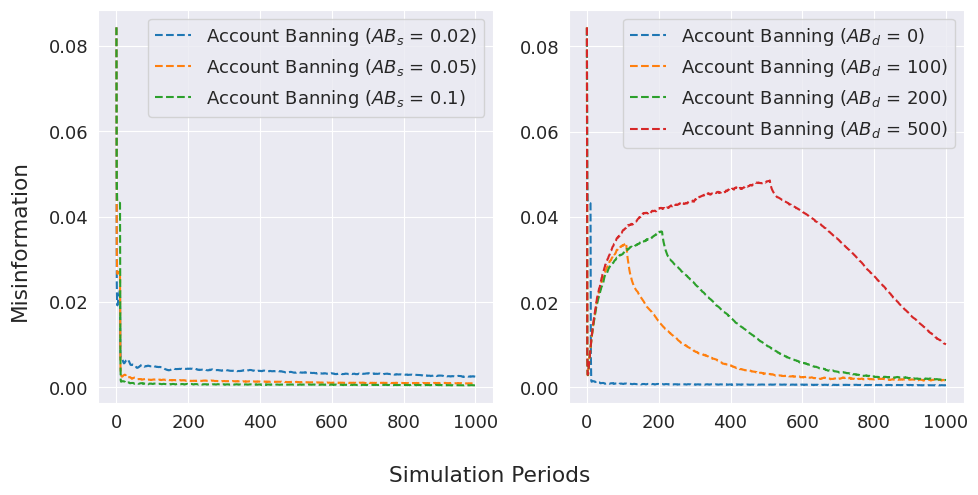

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))


#---------------------------------------------------------------------------
#                            BAN RANGE EXP
#---------------------------------------------------------------------------


fig.supylabel('Misinformation')
fig.supxlabel('Simulation Periods')

x = np.linspace(0, 1000, 1000)

mim2_br01_y = mim2_br01_mdf['misinformation']
mim2_br005_y = mim2_br005_mdf['misinformation']
mim2_br002_y = mim2_br002_mdf['misinformation']

axes[0].plot(x, smooth(mim2_br002_y, 0),'--', label=r'Account Banning ($AB_s$ = 0.02)')
axes[0].plot(x, smooth(mim2_br005_y, 0),'--', label=r'Account Banning ($AB_s$ = 0.05)')
axes[0].plot(x, smooth(mim2_br01_y, 0), '--', label=r'Account Banning ($AB_s$ = 0.1)')


#---------------------------------------------------------------------------
#                            ACTIVATION DELAY
#---------------------------------------------------------------------------

mim2_ad0_y = mim2_ad0_mdf['misinformation']
mim2_ad100_y = mim2_ad100_mdf['misinformation']
mim2_ad200_y = mim2_ad200_mdf['misinformation']
mim2_ad500_y = mim2_ad500_mdf['misinformation']

axes[1].plot(x, smooth(mim2_ad0_y, 0), '--', label=r'Account Banning ($AB_{d}$ = 0)')
axes[1].plot(x, smooth(mim2_ad100_y, 0),'--', label=r'Account Banning ($AB_{d}$ = 100)')
axes[1].plot(x, smooth(mim2_ad200_y, 0),'--', label=r'Account Banning ($AB_{d}$ = 200)')
axes[1].plot(x, smooth(mim2_ad500_y, 0),'--', label=r'Account Banning ($AB_{d}$ = 500)')


axes[0].legend(loc='best')
axes[1].legend(loc='best')

# ax.set_title('Misinformation changes under \n different intervention methods')
plt.tight_layout()

plt.savefig('data/graphs/exp2_misinf_bs+ap.png', dpi=500)


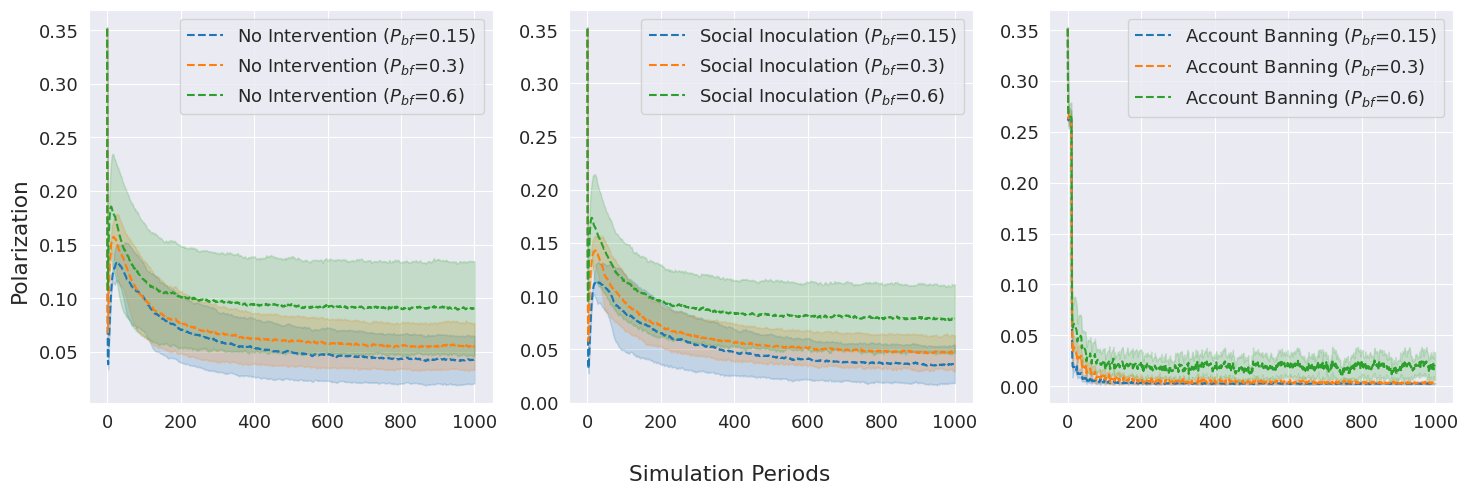

In [9]:

fig1, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
x = np.linspace(0, 1000, 1000)

mim1_bfp015_y = mim1_bfp015_mdf['polarization']
mim1_bfp03_y = mim1_bfp03_mdf['polarization']
mim1_bfp06_y = mim1_bfp06_mdf['polarization']

mim2_bfp015_y = mim2_bfp015_mdf['polarization']
mim2_bfp03_y = mim2_bfp03_mdf['polarization']
mim2_bfp06_y = mim2_bfp06_mdf['polarization']

mim3_bfp015_y = mim3_bfp015_mdf['polarization']
mim3_bfp03_y = mim3_bfp03_mdf['polarization']
mim3_bfp06_y = mim3_bfp06_mdf['polarization']



mim1_bfp015_std = np.std([mdf['polarization'] for mdf in mim1_bfp015_mdf_nm], axis=0)
mim1_bfp03_std = np.std([mdf['polarization'] for mdf in mim1_bfp03_mdf_nm], axis=0)
mim1_bfp06_std = np.std([mdf['polarization'] for mdf in mim1_bfp06_mdf_nm], axis=0)

mim2_bfp015_std = np.std([mdf['polarization'] for mdf in mim2_bfp015_mdf_nm], axis=0)
mim2_bfp03_std = np.std([mdf['polarization'] for mdf in mim2_bfp03_mdf_nm], axis=0)
mim2_bfp06_std = np.std([mdf['polarization'] for mdf in mim2_bfp06_mdf_nm], axis=0)

mim3_bfp015_std = np.std([mdf['polarization'] for mdf in mim3_bfp015_mdf_nm], axis=0)
mim3_bfp03_std = np.std([mdf['polarization'] for mdf in mim3_bfp03_mdf_nm], axis=0)
mim3_bfp06_std = np.std([mdf['polarization'] for mdf in mim3_bfp06_mdf_nm], axis=0)

axes[0].plot(x, smooth(mim1_bfp015_y, 0), '--', label=r'No Intervention ($P_{bf}$=0.15)')
axes[0].plot(x, smooth(mim1_bfp03_y, 0), '--', label=r'No Intervention ($P_{bf}$=0.3)')
axes[0].plot(x, smooth(mim1_bfp06_y, 0), '--', label=r'No Intervention ($P_{bf}$=0.6)')

axes[2].plot(x, smooth(mim2_bfp015_y, 0), '--', label=r'Account Banning ($P_{bf}$=0.15)')
axes[2].plot(x, smooth(mim2_bfp03_y, 0), '--', label=r'Account Banning ($P_{bf}$=0.3)')
axes[2].plot(x, smooth(mim2_bfp06_y, 0), '--', label=r'Account Banning ($P_{bf}$=0.6)')

axes[1].plot(x, smooth(mim3_bfp015_y, 0), '--', label=r'Social Inoculation ($P_{bf}$=0.15)')
axes[1].plot(x, smooth(mim3_bfp03_y, 0), '--', label=r'Social Inoculation ($P_{bf}$=0.3)')
axes[1].plot(x, smooth(mim3_bfp06_y, 0), '--', label=r'Social Inoculation ($P_{bf}$=0.6)')

axes[0].fill_between(x, mim1_bfp015_y - mim1_bfp015_std, mim1_bfp015_y + mim1_bfp015_std, color=palette[0], alpha=0.2)
axes[0].fill_between(x, mim1_bfp03_y - mim1_bfp03_std, mim1_bfp03_y + mim1_bfp03_std, color=palette[1], alpha=0.2)
axes[0].fill_between(x, mim1_bfp06_y - mim1_bfp06_std, mim1_bfp06_y + mim1_bfp06_std, color=palette[2], alpha=0.2)

axes[1].fill_between(x, mim3_bfp015_y - mim3_bfp015_std, mim3_bfp015_y + mim3_bfp015_std, color=palette[0], alpha=0.2)
axes[1].fill_between(x, mim3_bfp03_y - mim3_bfp03_std, mim3_bfp03_y + mim3_bfp03_std, color=palette[1], alpha=0.2)
axes[1].fill_between(x, mim3_bfp06_y - mim3_bfp06_std, mim3_bfp06_y + mim3_bfp06_std, color=palette[2], alpha=0.2)

axes[2].fill_between(x, mim2_bfp015_y - mim2_bfp015_std, mim2_bfp015_y + mim2_bfp015_std, color=palette[0], alpha=0.2)
axes[2].fill_between(x, mim2_bfp03_y - mim2_bfp03_std, mim2_bfp03_y + mim2_bfp03_std, color=palette[1], alpha=0.2)
axes[2].fill_between(x, mim2_bfp06_y - mim2_bfp06_std, mim2_bfp06_y + mim2_bfp06_std, color=palette[2], alpha=0.2)

axes[0].legend(loc='best')
axes[1].legend(loc='best')
axes[2].legend(loc='best')

fig1.supylabel('Polarization')
fig1.supxlabel('Simulation Periods')
# ax.set_title('Misinformation changes under \n different intervention methods')


plt.tight_layout()
plt.savefig('data/graphs/exp2_pol_line.png', dpi=500)
